# Statistiska Metoder Laboration
## Daniel Claesson, AI-23, ITHS

### Analys av iris datasetet.

#### Frågeställningar och arbetsgång:
- Jag delar in arbetet i olika faser av analys. Denna notebook följer den arbetsgången.
- Iris datasetet innehåller data på längd och bredd för bägarblad (sepal) och kronblad (petal), för tre olika sorters iris blomma.
- Det finns data för totalt 150 bloomor, 50 av varje iris sort.
- Analysen kommmer kretsa runt dessa metrics, tex medelvärden, spridningsmått mm för de olika sorterna av iris, även jämförelser av populationer.
- Eftersom datan kommer från naturen bör mycket vara normalfördelat.
- Datan samlades in av biologen Ronald Fischer 1936. - Datasetet bör kunna anses som ett stickprov från en population (populationen = alla världens iris blommor av de aktuella typerna), så en del av min analys kommer gå ut på att skatta populationen baserat på stickprovet.

#### Grundläggande analys av datasetet:
- Syfte: Få en förståelse av datasetet och vad det innehåller genom olika basic Pandas funktioner. Såsom, hur stort är datasetet, vilka variabler innehåller det, finns det nan's som bör rensa bort, osv.

#### Statistiska mått:
- medelvärde, median, typvärde med mera för de olika metrics, för varje class av iris. Även kvartiler.
- gör bar plots för de fyra metrics, för varje iris sort, i samma plot.
- gör histogram med de tre olika arterna av iris.

#### Konfidensintervall:
- Datasetet är ett stickprov från en större population. Skatta populationens väntevärde (my) och spridningsmått (sigma), baserat på stickprovsdata. Finns det funktioner för detta i SciPy?

#### Hypotestest:
- Testa hypotesen att spridningen i en population ej skiljer mot spridningen i en annan population.

#### Linär Regressions modell (OLS):
- Plotta sepal_lenght mot sepal_width i samma diagram, för setosa.
- Spara linjens lutning och intercept som variabler att använda i prediktion.

#### Prediktion:
- Använda intercept och lutning för att göra en prediktion på förväntat utfall, "out of sample prediction".

#### Korrelation:
- Använder Pandas funktion corr för att undersöka korrelationen mellan parametrar för arten setosa.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings(category=FutureWarning, action="ignore") # Denna hindrar vissa varningar för att visas.

#### Läser in datasetet

In [6]:
iris = pd.read_csv(r'C:\Users\danie\Documents\GitHub\Statistiska_Metoder\Data\iris.csv') # läser in iris dataset som en Pandas DataFrame

# Grundläggande analys av datasetet:
- För att få insikt i datasetet gör jag en del basic analys med olika pandas funktioner. Syftet är att ta reda på hur stort datasetet är, vilka datatyper som finns i det, vilka olika data som finns representerat (kolumner), om det finns nan's som behöver hanteras osv.

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.columns

Index(['sepal_length', ' sepal_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')

#### Jag ser att några av kolumnernas namn börjar med ett whitespace. För att förenkla, så döper jag om dessa.

In [9]:
iris.rename(columns={' sepal_width':'sepal_width',' petal_length':'petal_length',' petal_width':'petal_width',' class':'class'}, inplace=True) # döper om kolumnerna, inplace gör att ändringarna blir permanenta i variabeln.

#### Jag undersöker hur många olika sorters iris det finns i datasetet, samt hur många stickprov av varje sort.
- Det finns 3 olika iris sorter och det är 50 stickprov av varje sort.
- De olika iris sorterna heter setosa, versicolor och virginica.

In [10]:
iris["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Jag väljer att ta bort den överflödiga informationen "Iris-", för att göra det lite enklare och snyggare.

In [11]:
iris.replace({'Iris-' : ''}, regex=True, inplace=True ) # tar bort "Iris-"

### Identiferar vilka olika datatyper det finns i datasetet.
-  Alla numeriska värden på bladens bredd och längd är float64 och class är object.
- Det är 150 non-null värden i varje kolumn, det finns alltså inga nan's att ta hand om.

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Statistiska mått

#### Pandas funktionen describe räknar ut flera intressanta data för varje kolumn i datasetet, såsom tex:
- medelvärde (mean)
- kvartiler
- median (50%), 50-percentile
- min, max

Gör en loop som loopar igenom alla iris classerna, tar fram alla metrics med describe och sparar varje i en excel fil, som kan användas i rapporten. Den gör också en utskrift av alla data, per art av iris.

In [13]:
list_of_class = iris['class'].unique().tolist() #skapar en lista med strings för varje unikt namn på iris-blommorna

for item in list_of_class: #loopar igenom listan och skriver ut 'describe' för varje art av iris
    describe_all = pd.DataFrame(iris[iris['class'] == item].describe())
    print(f'Iris class {item}:') # skriver en överskrift som innehåller namnet på iris blomman
    print(describe_all) # skriver ut datan

Iris class setosa:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000
Iris class versicolor:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.30000

#### Grouped boxplots över sepal_length/width och petal_length/width för de olika arterna av iris.
- Detta ger en bra visuell överblick över datasetet. Man får idéer på vilka typer av analyser som kan vara intressanta att göra. Tex skulle jag vilja analysera:
1. Skapa ett konfidensintervall för en population, baserat på stickprovsdatan, tex för setosa sepal_length.
2. Linjär regression mellan bredd och längd på blad, setosa sepal_length mot sepal_width.
2. Hypotestest för att se om det är någon statistisk skillnad i varians på sepal_length mellan setosa och versicolor.

<Axes: title={'center': 'Petal Width'}, xlabel='class', ylabel='petal_width'>

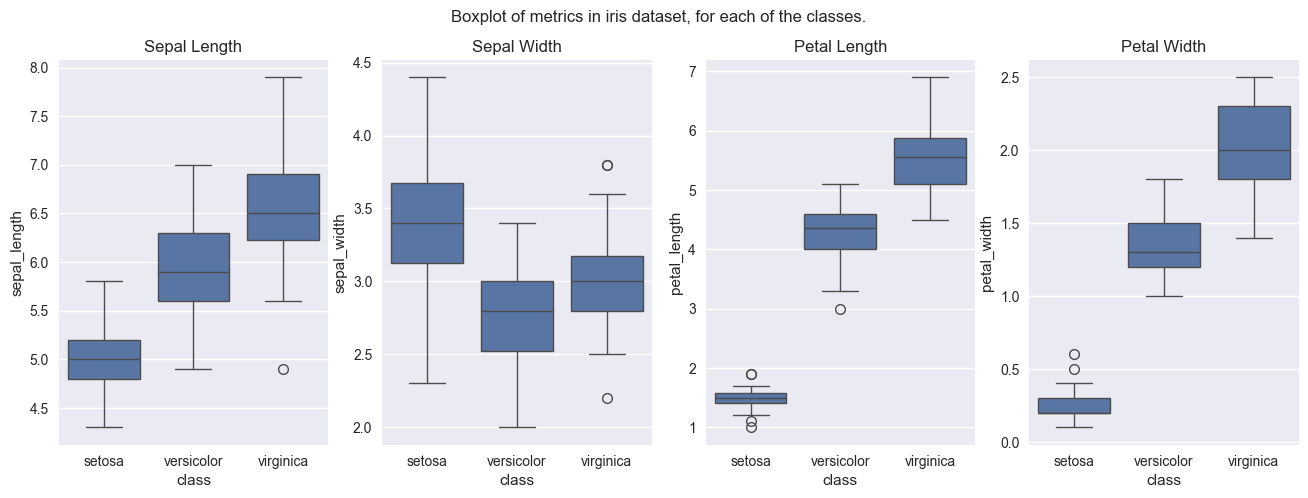

In [14]:
plt.style.use('seaborn-v0_8') # väljer en "style" som jag tycker är snygg
fig, axs = plt.subplots(1, 4, figsize=(16,5), ) # skapar en figur med 4 subplots på samma rad
axs[0].set_title('Sepal Length') # anger en titel för första subploten, osv för de övriga subplottarna
axs[1].set_title('Sepal Width')
axs[2].set_title('Petal Length')
axs[3].set_title('Petal Width')
fig.suptitle('Boxplot of metrics in iris dataset, for each of the classes.') # anger en titel för hela figuren
sns.boxplot(x='class', y='sepal_length', data=iris, ax=axs[0]) # datan som ska visas i subplot 1, vilket är en seaborn boxplot med 'sepal_length', osv nedan
sns.boxplot(x='class', y='sepal_width', data=iris, ax=axs[1])
sns.boxplot(x='class', y='petal_length', data=iris, ax=axs[2])
sns.boxplot(x='class', y='petal_width', data=iris, ax=axs[3])

### 95%-igt konfidensintervall för medelvärdet för setosa sepal_length
- Syfte: beräkna ett 95%-igt konfidensintervall för populationens medelvärde, för sepal_length för arten setosa.
- Signifikansnivån (alpha) blir då 0.05.
- De 50 observationerna i datasetet, ser vi som ett stickprov från en större population.
- Vi känner inte till populationens standardavvikelse, därför använder vi oss av t-fördelningen. [SciPy t documentation]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html')
- SciPy's t-fördelning har en inbyggd funktion för att beräkna konfidensintevall, som heter 'interval', står om den i dokumentationen.
- Slutsatsen är att intervallskattningen för sepal_length medelvärde är mellan 4.90582 och 5.10618. Innebörden är, att vid upprepade stickprov kommer 95% av intervallskattningarna innehålla det sanna medelvärdet (my).

In [15]:
from scipy.stats import t # importerar t-fördelningen
alpha = 0.05 # variabeln alfa tilldelas signifikansnivån 0.05 eftersom vi ska ha ett 95%-igt konfidensintervall
setosa = iris[iris['class'] == 'setosa'] # skapar en dataframe som enbart innehåller iris av arten setosa
mean = setosa['sepal_length'].mean() # beräknar medelvärdet av sepal_length för setosa
sem = scs.sem(setosa['sepal_length']) # beräknar standart error of the means, med scipy.stat funktionen sem
n = len(setosa['sepal_length']) # beräknar n för stickprovet
lower, upper = t.interval(confidence=1-alpha, df=n-1, loc=mean, scale=sem) #lower och upper tilldelas outputen från funktionen interval
print(f'Lower: {round(lower,5)} \nUpper:{round(upper,5)}') #printar

Lower: 4.90582 
Upper:5.10618


Spontant tyckte jag att intervallskattningen känns lite snäv, så jag beräknar den nedan "manuellt" också. Jag får samma resultat så det verkar stämma.

In [16]:
mean = np.mean(setosa['sepal_length']) # Beräkna medelvärde för stickprovet
std = np.std(setosa['sepal_length'], ddof=1) # Beräkna standardavvikelse för stickprovet
n = len(setosa['sepal_length']) # Beräkna n för stickprovet

alpha = 0.05 # Sätt signifikansgrad
t_crit = t.ppf(1-alpha/2, n-1) # Beräkna kritiskt t-värde
sem = std / np.sqrt(n) # Beräkna medelvärdesstandardfel

upper = mean - t_crit * sem # Beräkna under gräns
lower = mean + t_crit * sem # Beräkna övre gräns
print(f'Upper: {round(upper, 5)}')
print(f'Lower: {round(lower,5)}')

Upper: 4.90582
Lower: 5.10618


#### Linjär regression sepal_width mot sepal_length
-  Det är viktigt att man gör en linjär regression på relevant data. Om man inte delar upp datan per art av iris drar man lätt fel slutsatser. Graferna nedan illustrerar varför detta är viktigt, då man enkelt ser skillnaden i lutning på linjerna mellan de två graferna.
Graf 1: Linjär regression för alla punkter (sepal_width ~ sepal_length). Gör man på detta sättet får man resultatet att med ökande sepal_lenght minskar sepal_width, vilket är felaktigt.
Graf 2: Linjär regression för alla punkter, men för de tre olika arterna av iris.
Graf 3: Linjär regression för alla punkter för arten setosa.

Text(0.5, 1.0, 'Graf 3: Linjär regression för setosa\n (sepal_width ~ sepal_length)')

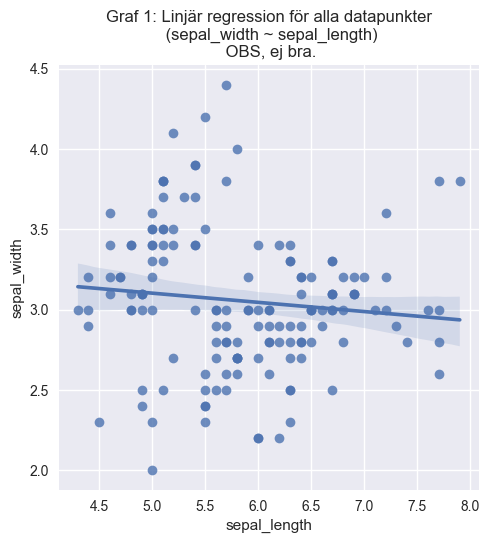

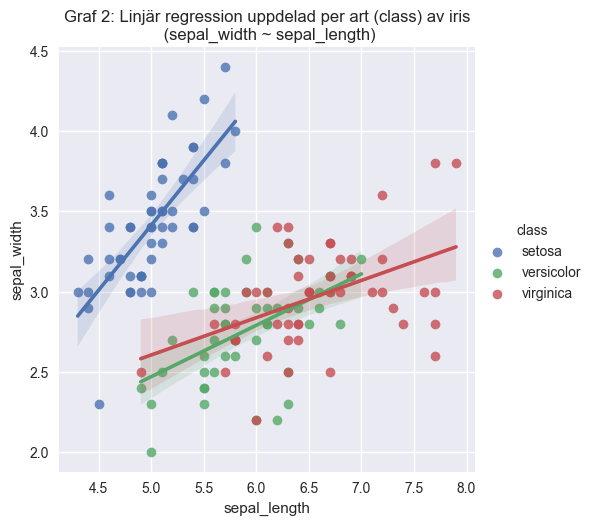

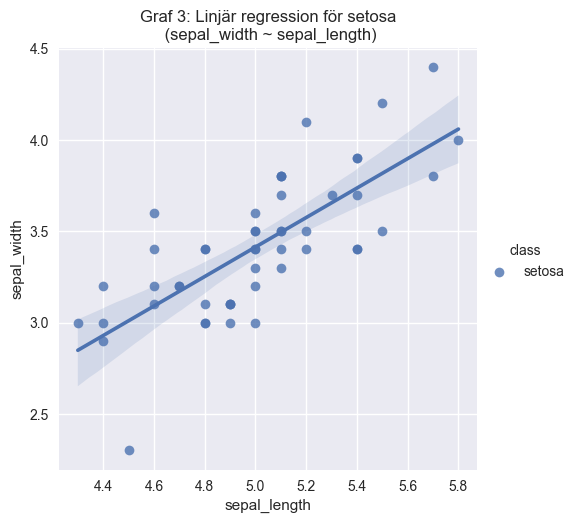

In [17]:
sns.lmplot(data=iris, x='sepal_length', y='sepal_width') # linjär regression för alla datapunkter (alla arter av iris)
ax = plt.gca()
ax.set_title(f"Graf 1: Linjär regression för alla datapunkter\n (sepal_width ~ sepal_length)\n OBS, ej bra.")
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', hue='class') # linjär regression, datan uppdelad per art av iris
ax = plt.gca()
ax.set_title("Graf 2: Linjär regression uppdelad per art (class) av iris\n (sepal_width ~ sepal_length)")
plot3 = sns.lmplot(data=setosa, x='sepal_length', y='sepal_width', hue='class') # linjär regression, endast för setosa
ax = plt.gca()
ax.set_title("Graf 3: Linjär regression för setosa\n (sepal_width ~ sepal_length)")

### Linjär regression med Statsmodel OLS (Ordinary Least Sqaures)
- För setosa (sepal_length ~ sepal_width), motsvarande Graf 3 ovan.
- Från "OLS Regression Results" kan man kan bland annat läsa ut (vilket ser rimligt ut baserat på Graf 3):
1. Intercept = -0.623
2. Lutning = 0.8072
3. R-squared = 0.558

In [18]:
model = ols('sepal_width ~ sepal_length', data=setosa).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           4.75e-10
Time:                        18:29:13   Log-Likelihood:                -1.8042
No. Observations:                  50   AIC:                             7.608
Df Residuals:                      48   BIC:                             11.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6230      0.521     -1.196   

### Hypotestest för varians mellan två populationer (Sepal_length för setosa och versicolor)
- Jag väljer att göra ett 95%-igt hypotestest för varians för sepal_length för arterna setosa och versicolor. Signifikansnivå = 0.05.
- Min nollhypotes är att det inte är en signifikant skillnad i varians dem emellan, dvs nollhypotesen är:
<br>
        
$H_0: \sigma^2_{setosa} = \sigma^2_{versicolor}$

<br>
Samt alternativhypotesen är:
<br>

$H_A: \sigma^2_{setosa} \neq \sigma^2_{versicolor}$
<br><br>

In [19]:
versicolor = iris[iris['class'] == 'versicolor'] # skapar en dataframe med alla versicolor.

Teststatistikan beräknas. För fallet med hypotestest för varians för två populationer, ges den av:
<h4>

$F=\frac{\sigma^2_1}{\sigma^2_2}$
</h4>

Beräknas nedan:

In [20]:
teststatistika = np.var(setosa['sepal_length'], ddof=1) / np.var(versicolor['sepal_length'], ddof=1) # beräknar teststatistika
print(f'Teststatistika: {round(teststatistika,5)}') # printar teststatistika

Teststatistika: 0.46634


Beräkning av kritiska värden:
- Eftersom vi har "lika med" och "skiljt ifrån" så kommer vi få ett dubbelsidigt konfidens intervall, med halva signifikansen per sida.
- cdf är cumulative distribution function (dvs högra sidan av konfidensintervallet). ppf funktionen är inversen av cdf, dvs vi kan beräkna cdf med inversen av ppf.
- Länk till dokumentationen: [Länk till dokumentaion f-fördelningen, SciPy]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f')

In [21]:
from scipy.stats import f # importerar f-fördelningen

ppf_test = f.ppf(q=0.025, dfn=len(setosa['sepal_length'])-1, dfd=len(versicolor['sepal_length'])-1) # beräknar vänstra sidans kritiska värde, ppf (percent point function)
print(f'F-kritiskt värde, "vänster": {round(ppf_test,5)}') # printar vänstra sidan av konfidensintervallet
print(f'F-kritiskt värde, "höger": {round(1/ppf_test,5)}') # printar högra sidan av konfidensintervallet (cumulative distribution function, cdf = 1/ppf)

F-kritiskt värde, "vänster": 0.56748
F-kritiskt värde, "höger": 1.76219


Slutsatsen från hypotestet är att vi ska förkasta nollhypotesen, eftersom teststatistikan är mindre än det kritiska värdet.

### Prediktion
- Tänker mig att man kan använda räta linjens ekvation, som vi erhöll från den linjära regressionen (OLS), för att prediktera utfall.
- Använder mig av OLS analysen på setosa sepal_lenght och sepal_width, för att erhålla intercept och lutning.
- Variabeln "model" som vi fick fram med OLS mha statsmodels, är en "RegressionResultsWrapper" som innehåller interceptet och lutningen på den räta linjeanpassningen. Genom kommandot model.params kan vi se värdena. Index 0 är interceptet och index 1 är lutningen.
- Tilldelar variabler intercept och lutning, för att använda senare i analysen.

In [22]:
Intercept = model.params[0] # tilldelar variabeln Intercept, interceptet från regressionsanalysen
Lutning = model.params[1] # tilldelar variabeln Lutning, lutningen från regressionsanalysen
print(f'Intercept = {round(Intercept, 5)}') # skriver ut interceptet
print(f'Lutning = {round(Lutning, 5)}') # skriver ut lutningen på linjen

Intercept = -0.62301
Lutning = 0.80723


Nedan skapar jag en ny dataframe med prediktioner, som jag sedan kommer concatenera ihop med setosa dataframen. Målet är att enkelt kunna plotta datan och prediktionen i samma plot. För att kunna göra detta så skapar jag också en ny datafram setosa2, som innehåller enbart de intressant kolumnerna.
I numpy arrayen fictive_sepal_length kan man addera fler värden som man vill ha prdiction på.

In [36]:
fictive_sepal_length = np.array([2, 6, 8, 10]) # en array med fiktiva sepal_length (x-värden), för vilka vi vill prediktera sepal_width (y-värden). Här kan man fritt addera fler värden.
predicted_sepal_width = np.array([fictive_sepal_length * Lutning + Intercept]) # skapar predikterade sepal_width baserat på fiktiva sepal_length, mha intercept och lutning från regressionsanalysen
df_fictive_sepal_length = pd.DataFrame(fictive_sepal_length)
df_fictive_sepal_width = pd.DataFrame(predicted_sepal_width).transpose()
df_predictions = pd.concat([df_fictive_sepal_length, df_fictive_sepal_width], axis='columns')
df_predictions.loc[:,'class'] = 'setosa prediction' # skapar en ny kolumn 'class' som anger att det är en pridiction
df_predictions.columns=(['sepal_length', 'sepal_width', 'class'])
df_predictions.head()

,sepal_length,sepal_width,class
0,2,0.991456,setosa prediction
1,6,4.220390,setosa prediction
2,8,5.834858,setosa prediction
3,10,7.449325,setosa prediction


Skapar en ny dataframe setosa2 med enbart de nödvändiga kolumnerna för sepal_length och sepal_width.

In [24]:
setosa2 = pd.DataFrame({'sepal_length' : np.zeros(len(setosa)),'sepal_width' : np.zeros(len(setosa)),'class' : np.zeros(len(setosa))})
setosa2.loc[:,'sepal_length'] = setosa.loc[:,'sepal_length']
setosa2.loc[:,'sepal_width'] = setosa.loc[:,'sepal_width']
setosa2.loc[:,'class'] = setosa.loc[:,'class']
setosa2.head(5)

,sepal_length,sepal_width,class
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


Concatenerar ihop setosa2 och df_predictions så att all intressant data ligger i samma dataframe.

In [25]:
total = pd.concat([setosa2, df_predictions], axis="index") # dataframen total innehåller datan och den predikterade datan

Plottar prediktionen i samma graf som datan ligger. Det ser ut att fungera som tänkt.
- Inser att jag kunde använt andra inbyggda funktioner för detta också...

Text(0.5, 1.0, 'Graf 4: Prediktion av setosa\n (sepal_width ~ sepal_length)')

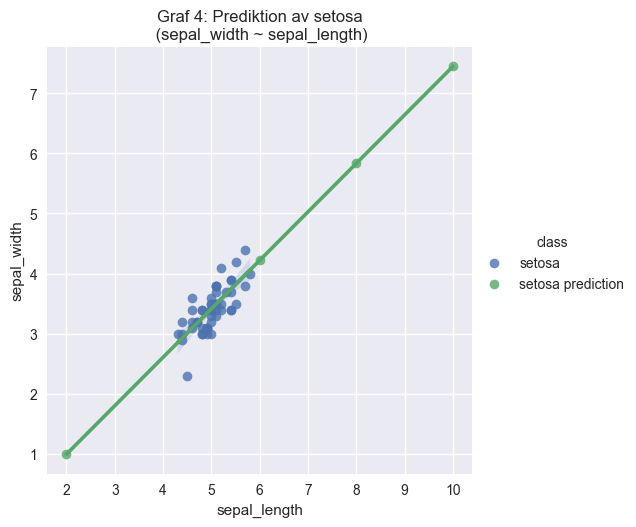

In [26]:
sns.lmplot(data=total, x='sepal_length', y='sepal_width', hue='class') # linjär regression, endast för setosa
ax = plt.gca()
ax.set_title("Graf 4: Prediktion av setosa\n (sepal_width ~ sepal_length)")

### Korrelation
- För setosa.
- Slutsatser: Ganska hög korrelation mellan sepal_length och sepal_width (0.75). Mycket lägre korrelation mellan petal_length och petal_width (0.31).
- För att förstå bättre så plottar jag scatter plots för det två som jag tittat lite extra på. Tydligt att det är sämre korrelation för petal_length / petal_widht.

<Axes: >

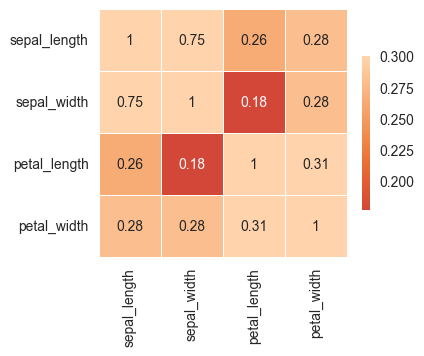

In [32]:
corr = setosa.corr(numeric_only=True) # skapar en Pandas DataFrame med korrelationsdata för setosa.
f, ax = plt.subplots(figsize=(4, 4)) # Skapar en matplotlib figur

sns.heatmap(corr, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Skapar en korrelations heatmap, med dataframen som skapades ovan

Text(0.5, 1.0, 'Graf 2: Linjär regression för setosa\n (petal_width ~ petal_length)')

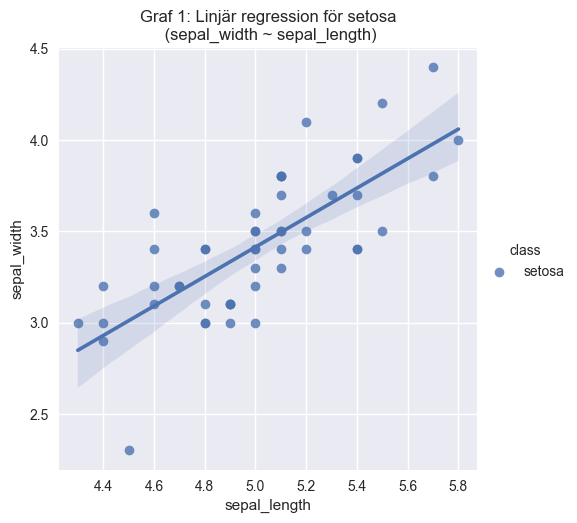

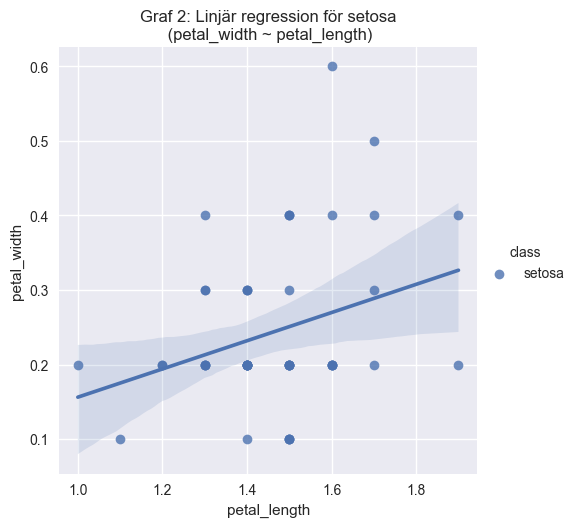

In [35]:
plot1 = sns.lmplot(data=setosa, x='sepal_length', y='sepal_width', hue='class') # linjär regression, endast för setosa sepal_length och sepal_width
ax = plt.gca()
ax.set_title("Graf 1: Linjär regression för setosa\n (sepal_width ~ sepal_length)")

plot2 = sns.lmplot(data=setosa, x='petal_length', y='petal_width', hue='class') # linjär regression, endast för setosa petal_length och petal_width
ax = plt.gca()
ax.set_title("Graf 2: Linjär regression för setosa\n (petal_width ~ petal_length)")